1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [2]:
import numpy as np
import numpy.random as npr
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4

'%.4f'

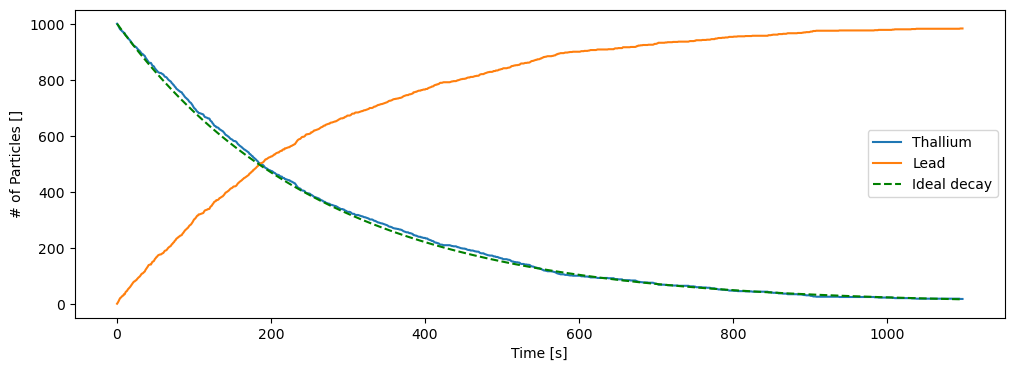

In [2]:
N0 = 1000
Lead = 0
Tau = 3.052 * 60

def decay(t=1, tau = 3.052 * 60):
    return ( 1 - 2**(-t/tau))

time = np.arange(0,np.ceil(6*Tau),1, dtype = int)
# Single time step because it's as if we're redefining the initial condition every second
f = decay(1,Tau)

Thallium = [1000]
Lead = [0]
for t in range (len(time)-1):
    U = npr.uniform(0,1,Thallium[-1])
    # The lenght of the accepted events corresponds to the number of particles that decayed in this time-step
    accepted = [U[i] for i in range(0,len(U)) if (U[i] <= f) ]
    Thallium.append(Thallium[-1] - len(accepted))
    Lead.append(Lead[-1] + len(accepted))

def ideal(N0,t, tau = 3.052 * 60):
    return (N0*0.5**(t/tau))

ideal_decay = ideal(N0,time,Tau)

plt.figure(figsize=(12,4))
plt.plot(time,Thallium, label = "Thallium")
plt.plot(time, Lead, label = "Lead")
plt.plot(time, ideal_decay, label = "Ideal decay", ls="--", c = "green")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("# of Particles []")
plt.show()

Taking $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ and requiring that its integral between 0 and x(z) equal to z we obtain
$2^{-x(z)/\tau} = 1 - z$ and therefore $x(z) = -\tau  log_2(1-z)$

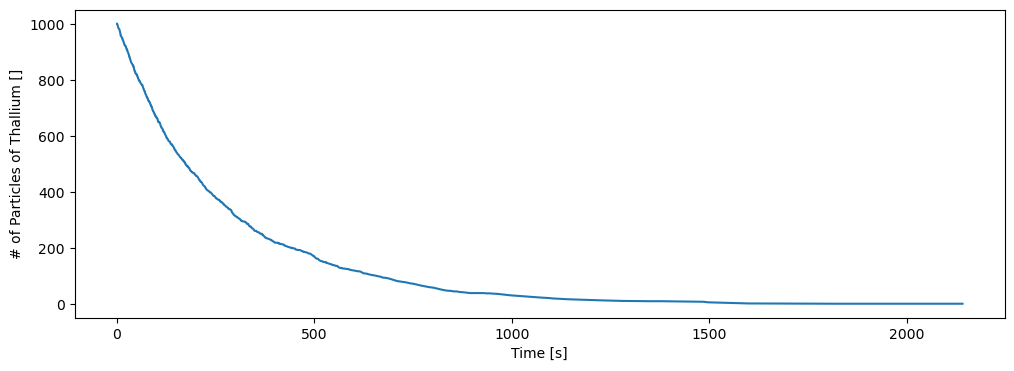

In [3]:
def sample_times(u,tau):
    return ( -tau*np.log2(1-u) )

u = npr.uniform(0,1,N0)
sampled_times = sample_times(u,Tau)
sampled_times= np.append(sampled_times, 0)
ord_times = np.sort(sampled_times)
time_diffs = [ord_times[i+1] - ord_times[i] for i in range (0,len(ord_times)-1)]
Tl= [1000]
for t in time_diffs:
    U = npr.uniform(0,1,Tl[-1])
    # The lenght of the accepted events corresponds to the number of particles that decayed in this time-step
    accepted = [U[i] for i in range(0,len(U)) if (U[i] <= decay(t)) ]
    Tl.append(Tl[-1] - len(accepted))
    
plt.figure(figsize=(12,4))
plt.plot(ord_times,Tl)
plt.xlabel("Time [s]")
plt.ylabel("# of Particles of Thallium []")
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [27]:
# The tangent is monotonically increasing in each period: for theta=pi/2 we get tan(pi/4) = 1
# Therefore we need the R.H.S of the equation greater than 1, which means b < Ze^2/....

# Values in units of the International System
Z = 79
e = 1.6e-19
eps0 = 8.85e-12

E = 7.7e6*e
a0 = 0.53e-10
sigma = a0/100
N = int(1e6)

# Maximum impact parameter value if bounce back is wanted
thr = (Z*e**2)/(2*np.pi*eps0*E)

# Use Box-Muller to emulate the beam with a 2D Gaussian
Z = npr.uniform(0,1,N)
b = np.sqrt( -2*sigma**2 * np.log(1-Z) )

deflected = b[b<thr]
bb_fraction = len(deflected)/N

print(f"Impact parameter must be lower than {thr} to have deflection")
print(f"The fraction {bb_fraction} of particles have bounced back")

[5.5940e-15 1.7582e-14 5.7707e-15 1.5435e-14 2.7046e-14]
Impact parameter must be lower than 2.952114580206262e-14 to have deflection
The fraction 0.001531 of particles have bounced back


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [9]:
def f(x):
    return ( (np.sin(1/(x*(2-x))) )**2 )

a = 0
b = 2
    
# Monte Carlo integration
N=100000
count=0
for i in range(N):
    x=2*npr.random()
    y=npr.random()
    if y<f(x): count+=1
I=2*count/N
print(I)

# mean value method
# randomly select points in the domain
x = npr.uniform(a,b,N)
I_mv = ((b-a)/N)*np.sum(f(x))
print(I_mv)

# Evaluate error of mean value method: calculate std. dev.
sigma = np.std( f(x), ddof=1 )
error = (b-a)*sigma/np.sqrt(N)
print(f"Mean value aboslute error: {error}")
print(f"Mean value relative error: {error/I_mv*100:.2f} %")

1.448
1.4531267741667768
Mean value aboslute error: 0.0016656073040697906
Mean value relative error: 0.11 %


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [26]:
from scipy.special import gamma

In [40]:
def Inside(v):
    R2 = 0
    for i in range (len(v)): R2 += v[i]**2
    if (R2 <=1): index = 1
    else: index = 0
    return (index)

def Generate (dim):
    vector = npr.uniform(0,1,int(dim))
    return (vector)

N = 100000
count = 0
dim = 2
for i in range(N):
    V = Generate(dim)
    f = Inside(V)
    q = npr.uniform(0,1)
    if q<f: count+=1
# Square (or cube in 3D) has sides of lenght 2
I=(2**dim)*count/N
print(I)

Areas = np.zeros(11, dtype=float)
TrueAreas = np.zeros(11, dtype=float)
Areas[0], Areas[1], = 0 , 2
TrueAreas[0], TrueAreas[1] = 0 , 2

def TrueSphere(dim, R=1):
    d = gamma(dim/2.0 + 1)
    V = (np.pi)**(dim/2.0)*(R**dim)/d
    return (V)
    
for i in range (2,10+1):
    dim = i
    count = 0
    for j in range (0,N):
        V = Generate(dim)
        f = Inside(V)
        q = npr.uniform(0,1)
        if q<f: count+=1
    Areas[i] = ( (2**dim)*count/N )
    TrueAreas[i] = ( TrueSphere(i) )
    
np.set_printoptions(precision=3)
print(Areas)
print(TrueAreas)

print(f"MonteCarlo relative errors: {np.abs(Areas[2:]-TrueAreas[2:])/Areas[2:]*100} %")

3.15132
[0.    2.    3.146 4.179 4.916 5.269 5.201 4.859 4.027 3.384 2.509]
[0.    2.    3.142 4.189 4.935 5.264 5.168 4.725 4.059 3.299 2.55 ]
MonteCarlo relative errors: [0.144 0.228 0.389 0.095 0.633 2.76  0.79  2.536 1.649] %


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [42]:
def f(x):
    return ( pow(x, -1/2)/(1+np.exp(x)) )

def w(x):
    return ( pow(x, -1/2) )

def W(x):
    return (2*np.sqrt(x))

a = 0
b = 1

N=10000
x = npr.uniform(a,b,N)
I = (1.0/N)*np.sum( f(x)/w(x) )*( W(b) - W(a) )
print(I)

0.7585562910613746
